In [1]:
import pandas as pd
import missingno as msno
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [3]:
census = pd.read_csv('acs2015_census_tract_data.csv')
census

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco,6205,3291,2914,99.7,0.3,0.0,0.0,...,0.9,3.3,2.3,22.5,1659,64.7,31.3,3.9,0.0,21.3
73997,72153750502,Puerto Rico,Yauco,2122,921,1201,99.2,0.3,0.0,0.0,...,0.0,0.0,0.0,23.5,484,64.0,32.6,3.3,0.0,22.4
73998,72153750503,Puerto Rico,Yauco,2277,1097,1180,99.5,0.4,0.0,0.0,...,3.2,0.0,3.0,29.8,582,58.2,32.3,9.5,0.0,23.3
73999,72153750601,Puerto Rico,Yauco,5267,2663,2604,98.8,1.2,0.0,0.0,...,0.0,0.0,0.0,26.9,1369,67.5,31.2,1.3,0.0,26.7


In [4]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusTract      74001 non-null  int64  
 1   State            74001 non-null  object 
 2   County           74001 non-null  object 
 3   TotalPop         74001 non-null  int64  
 4   Men              74001 non-null  int64  
 5   Women            74001 non-null  int64  
 6   Hispanic         73311 non-null  float64
 7   White            73311 non-null  float64
 8   Black            73311 non-null  float64
 9   Native           73311 non-null  float64
 10  Asian            73311 non-null  float64
 11  Pacific          73311 non-null  float64
 12  Citizen          74001 non-null  int64  
 13  Income           72901 non-null  float64
 14  IncomeErr        72901 non-null  float64
 15  IncomePerCap     73261 non-null  float64
 16  IncomePerCapErr  73261 non-null  float64
 17  Poverty     

In [5]:
census.isnull().sum()


CensusTract           0
State                 0
County                0
TotalPop              0
Men                   0
Women                 0
Hispanic            690
White               690
Black               690
Native              690
Asian               690
Pacific             690
Citizen               0
Income             1100
IncomeErr          1100
IncomePerCap        740
IncomePerCapErr     740
Poverty             835
ChildPoverty       1118
Professional        807
Service             807
Office              807
Construction        807
Production          807
Drive               797
Carpool             797
Transit             797
Walk                797
OtherTransp         797
WorkAtHome          797
MeanCommute         949
Employed              0
PrivateWork         807
PublicWork          807
SelfEmployed        807
FamilyWork          807
Unemployment        802
dtype: int64

In [6]:
census.isnull().sum().sum()

23569

<AxesSubplot:>

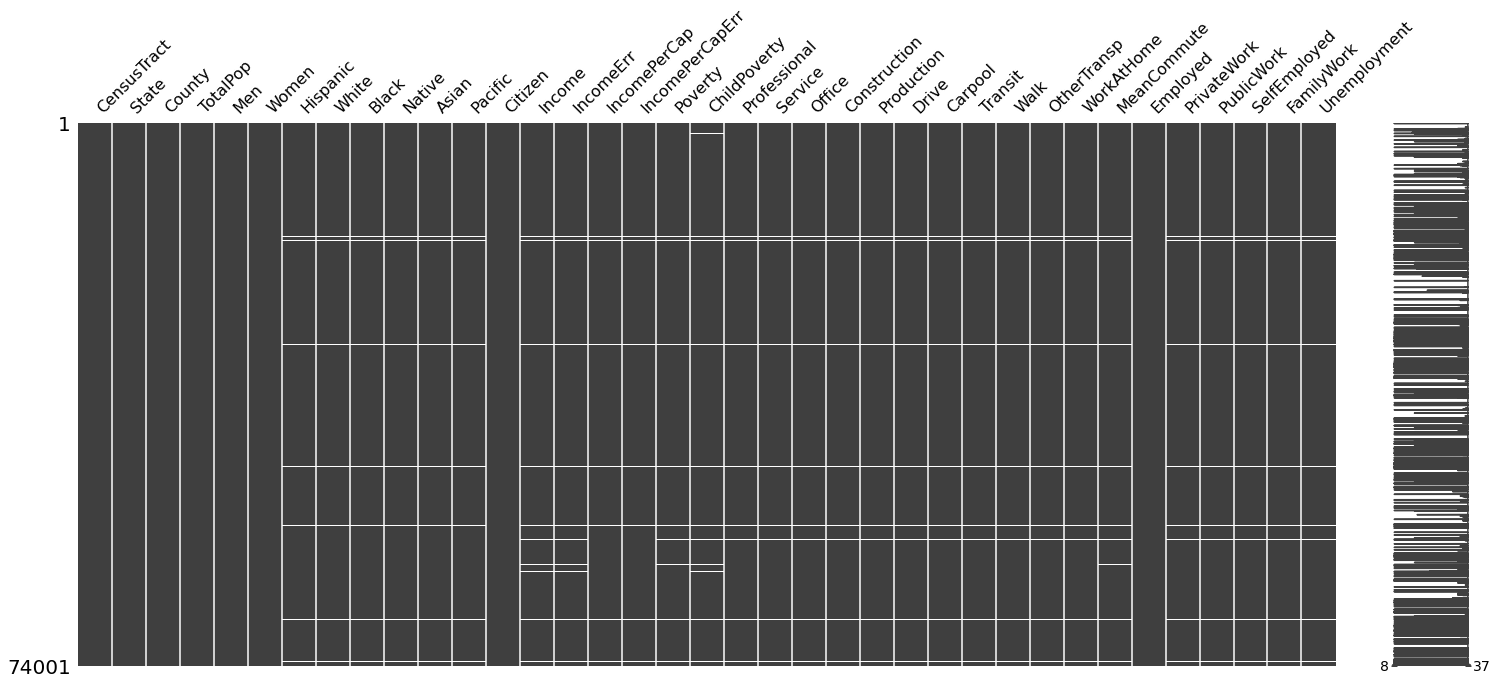

In [7]:
msno.matrix(census)

<AxesSubplot:>

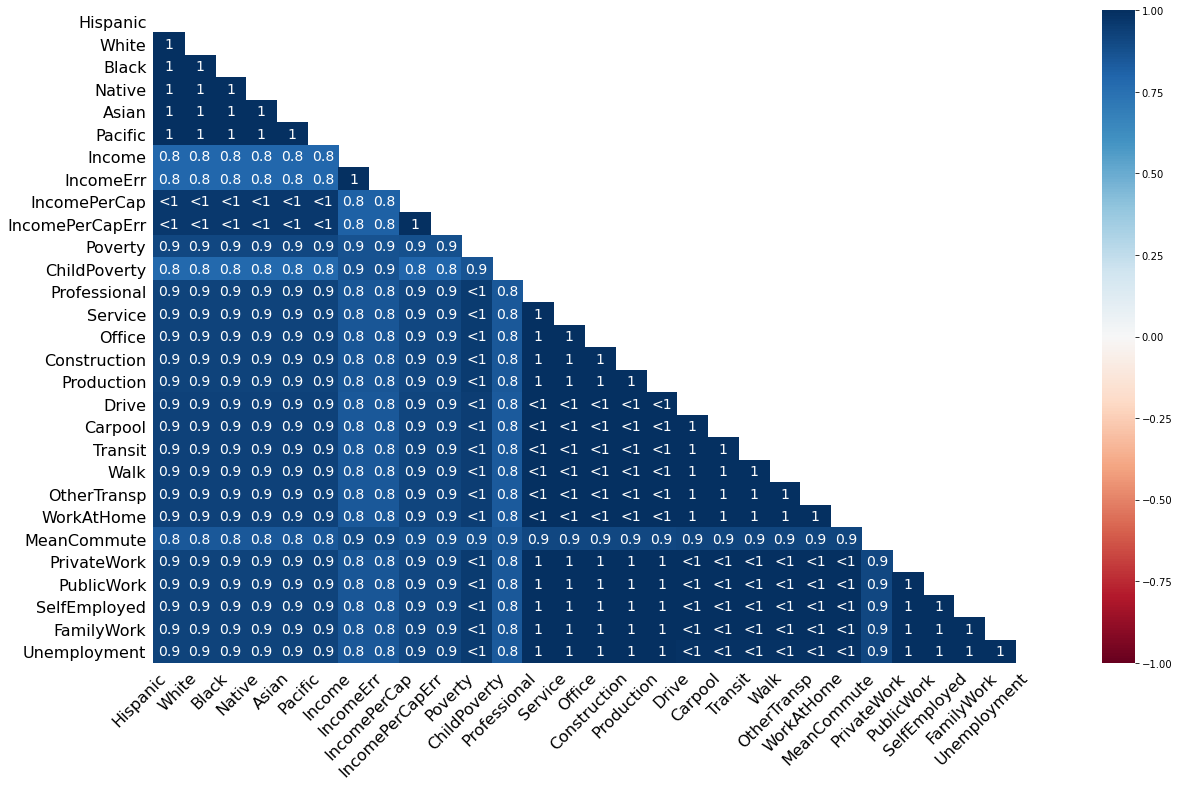

In [8]:
msno.heatmap(census)

In [9]:
for i in range(len(census.columns)):
    missing_data = census[census.columns[i]].isna().sum()
    perc = missing_data / len(census) * 100
    print('>%d, missing entries: %d, percentage %.2f' % (i, missing_data, perc))

>0, missing entries: 0, percentage 0.00
>1, missing entries: 0, percentage 0.00
>2, missing entries: 0, percentage 0.00
>3, missing entries: 0, percentage 0.00
>4, missing entries: 0, percentage 0.00
>5, missing entries: 0, percentage 0.00
>6, missing entries: 690, percentage 0.93
>7, missing entries: 690, percentage 0.93
>8, missing entries: 690, percentage 0.93
>9, missing entries: 690, percentage 0.93
>10, missing entries: 690, percentage 0.93
>11, missing entries: 690, percentage 0.93
>12, missing entries: 0, percentage 0.00
>13, missing entries: 1100, percentage 1.49
>14, missing entries: 1100, percentage 1.49
>15, missing entries: 740, percentage 1.00
>16, missing entries: 740, percentage 1.00
>17, missing entries: 835, percentage 1.13
>18, missing entries: 1118, percentage 1.51
>19, missing entries: 807, percentage 1.09
>20, missing entries: 807, percentage 1.09
>21, missing entries: 807, percentage 1.09
>22, missing entries: 807, percentage 1.09
>23, missing entries: 807, perce

/Users/katiechenning/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

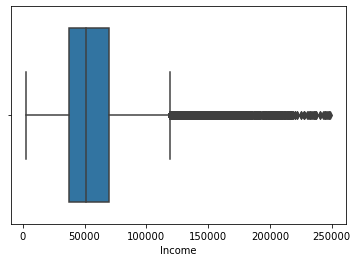

In [10]:
sns.boxplot(census.Income)

/Users/katiechenning/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

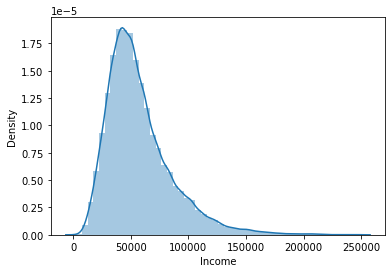

In [11]:
sns.distplot(census.Income)

/Users/katiechenning/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ChildPoverty'>

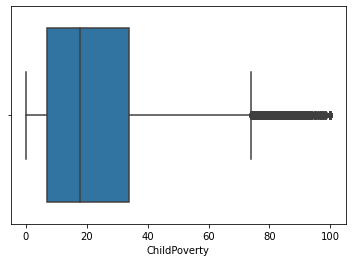

In [12]:
sns.boxplot(census.ChildPoverty)

/Users/katiechenning/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ChildPoverty', ylabel='Density'>

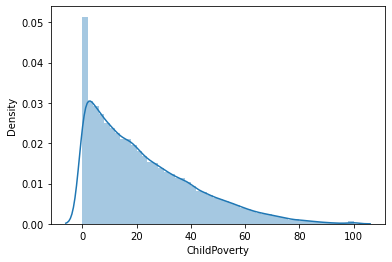

In [13]:
sns.distplot(census.ChildPoverty)

/Users/katiechenning/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Unemployment'>

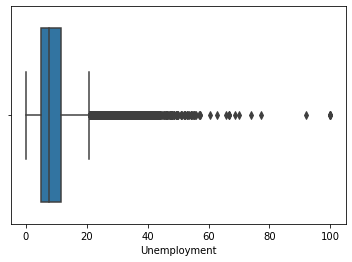

In [14]:
sns.boxplot(census.Unemployment)

/Users/katiechenning/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unemployment', ylabel='Density'>

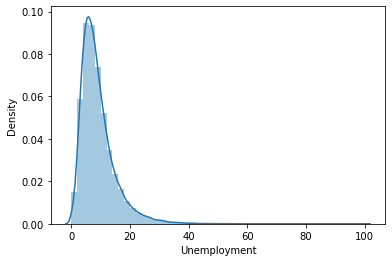

In [15]:
sns.distplot(census.Unemployment)

In [16]:
imputer.fit(census)

SimpleImputer(strategy='most_frequent')

In [17]:
census_filled = imputer.transform(census)

In [18]:
census_filled_df = pd.DataFrame(census_filled, columns = census.columns)

In [19]:
census_filled_df[census_filled_df['State'] != 'Puerto Rico']

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25,943,77.1,18.3,4.6,0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0,...,0,0.7,0,23.4,753,77,16.9,6.1,0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0,74.5,18.6,0.5,...,0,0,2.5,19.6,1373,64.1,23.6,12.3,0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0,...,0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73051,56043000200,Wyoming,Washakie,3256,1615,1641,12.3,84.7,1.8,0.3,...,4.3,0.5,9.2,15.3,1529,70.9,21.9,6,1.2,4.2
73052,56043000301,Wyoming,Washakie,2578,1264,1314,11.5,85.6,0,0,...,7.9,4.7,0.8,8.4,1175,67.5,23,9.5,0,6.7
73053,56043000302,Wyoming,Washakie,2566,1265,1301,18.6,76.2,0,0.5,...,7,3.9,2,12.6,1188,72.9,19.4,7.7,0,10.1
73054,56045951100,Wyoming,Weston,3442,1998,1444,2.4,93.6,0.4,1.4,...,1.3,2.4,2.9,33.9,1684,70.8,19.1,8,2.1,4.3


In [20]:
food_atlas = pd.read_excel('FoodAccessResearchAtlasData2015.xlsx', sheet_name = 'Food Access Research Atlas')

In [21]:
def food_desert_label(row):
    if row['LILATracts_1And10'] == 1:
        return 1
    if row['LILATracts_halfAnd10'] == 1:
        return 1
    if row['LILATracts_1And20'] == 1:
        return 1
    if row['LILATracts_Vehicle'] == 1:
        return 1
    else:
        return 0
    
    

In [22]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [23]:
food_atlas['food_desert_label'] = food_atlas.apply(lambda row: food_desert_label(row), axis=1)


In [24]:
no_food_deserts = food_atlas[food_atlas['food_desert_label']==0]

In [25]:
food_atlas

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,HUNVFlag,LowIncomeTracts,PovertyRate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,...,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,food_desert_label
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,0,0,0,0,0,10.0,74750,1,1,1,1,1,0,0,0,1357.480940,1732.225468,1357.480940,322.084612,411.690754,322.084612,1732.225468,0.905976,411.690754,0.215319,466.426430,0.243947,198.828220,0.103990,1482.881417,0.775566,184.319106,0.096401,12.718121,0.006652,0.000000,0.000000,13.969933,0.007306,38.336897,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,448,507,221,1622,217,14,0,14,45,44,26,112,0
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,0,0,0,0,0,18.2,51875,0,1,0,1,0,0,0,0,483.429683,1410.374828,483.429683,145.141418,475.306031,145.141418,1410.374828,0.649942,475.306031,0.219035,448.163512,0.206527,139.305390,0.064196,412.291349,0.189996,945.317796,0.435630,4.000000,0.001843,0.000000,0.000000,4.717582,0.002174,44.048101,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,763,606,214,888,1217,5,0,5,55,75,87,202,0
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,0,0,0,0,0,19.1,52905,1,1,1,1,1,0,0,0,1417.874893,2764.604126,1417.874893,696.636797,1350.176549,696.636797,2764.604126,0.819628,1350.176549,0.400290,744.891575,0.220839,346.203097,0.102640,2114.851375,0.626994,528.050101,0.156552,9.031083,0.002677,1.000000,0.000296,9.964775,0.002954,101.706798,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1578,894,439,2576,647,17,5,11,117,87,108,120,0
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,0,0,0,0,0,3.3,68079,1,1,1,1,1,0,0,0,1363.466885,3651.061015,1363.466885,409.587836,1067.844499,409.587836,3651.061015,0.832435,1067.844499,0.243467,846.613783,0.193026,766.521491,0.174766,3395.061920,0.774068,170.065452,0.038775,14.874754,0.003391,2.638384,0.000602,8.033406,0.001832,60.387114,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1241,1015,904,4086,193,18,4,11,74,85,19,82,0
4,10

In [26]:
food_desert_label_tract_dict = dict(zip(food_atlas.CensusTract, food_atlas.food_desert_label))
food_atlas_poverty_rate_dict = dict(zip(food_atlas.CensusTract, food_atlas.PovertyRate))
food_atlas_urban_dict = dict(zip(food_atlas.CensusTract, food_atlas.Urban))
food_atlas_median_family_income = dict(zip(food_atlas.CensusTract, food_atlas.MedianFamilyIncome))
food_atlas_seniors_dict = dict(zip(food_atlas.CensusTract, food_atlas.TractSeniors))
food_atlas_kids_dict = dict(zip(food_atlas.CensusTract, food_atlas.TractKids))
food_atlas_SNAP_dict = dict(zip(food_atlas.CensusTract, food_atlas.TractSNAP))

In [27]:
#food_atlas_SNAP_dict

In [28]:
#food_desert_label_tract_dict

In [29]:
food_atlas.isnull().sum().sum()

0

<AxesSubplot:>

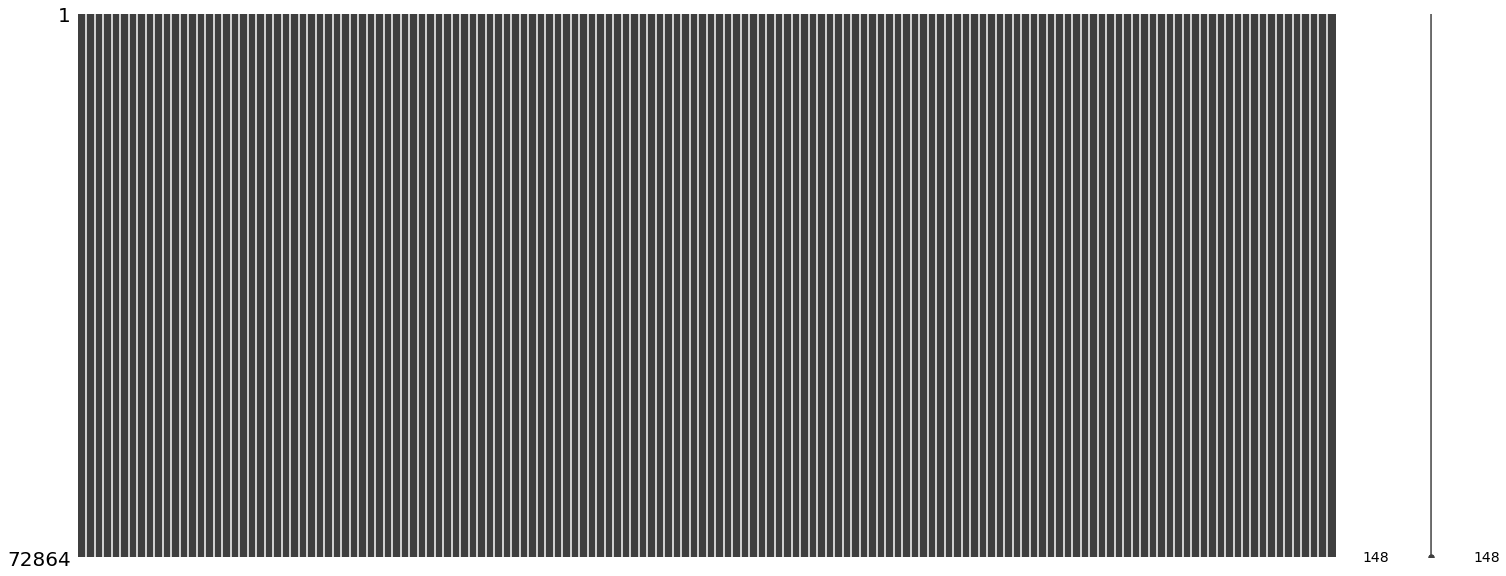

In [30]:
msno.matrix(food_atlas)

In [31]:
food_atlas_census_tracts = food_atlas['CensusTract'].tolist()
    

In [32]:
len(food_atlas_census_tracts)

72864

In [33]:
census_filled_df2 = census_filled_df[census_filled_df.CensusTract.isin(food_atlas_census_tracts)]


In [34]:
census_filled_df2.columns

Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [35]:
final_census_tracts = census_filled_df2['CensusTract'].tolist()


In [36]:
only_matching_tracts_dict = {k: food_desert_label_tract_dict[k] for k in final_census_tracts}
matching_poverty_tracts_dict = {k: food_atlas_poverty_rate_dict[k] for k in final_census_tracts}
matching_urban_tracts_dict = {k: food_atlas_urban_dict[k] for k in final_census_tracts}
matching_median_income_tracts_dict = {k: food_atlas_median_family_income[k] for k in final_census_tracts}
matching_seniors_tracts_dict = {k: food_atlas_seniors_dict[k] for k in final_census_tracts}
matching_kids_tracts_dicts = {k: food_atlas_kids_dict[k] for k in final_census_tracts}
matching_SNAP_tracts_dict = {k: food_atlas_SNAP_dict[k] for k in final_census_tracts}

In [37]:
len(matching_SNAP_tracts_dict)

72839

In [38]:
census_filled_df2['food_desert_label'] = census_filled_df2['CensusTract'].map(only_matching_tracts_dict)
census_filled_df2['PovertyRate'] = census_filled_df2['CensusTract'].map(matching_poverty_tracts_dict)
census_filled_df2['Urban'] = census_filled_df2['CensusTract'].map(matching_urban_tracts_dict)
census_filled_df2['MedianIncome'] = census_filled_df2['CensusTract'].map(matching_median_income_tracts_dict)
census_filled_df2['Seniors'] = census_filled_df2['CensusTract'].map(matching_seniors_tracts_dict)
census_filled_df2['Kids'] = census_filled_df2['CensusTract'].map(matching_kids_tracts_dicts)
census_filled_df2['Snap'] = census_filled_df2['CensusTract'].map(matching_SNAP_tracts_dict)


<ipython-input-38-b0b7a7175dad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_filled_df2['food_desert_label'] = census_filled_df2['CensusTract'].map(only_matching_tracts_dict)
<ipython-input-38-b0b7a7175dad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_filled_df2['PovertyRate'] = census_filled_df2['CensusTract'].map(matching_poverty_tracts_dict)
<ipython-input-38-b0b7a7175dad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [39]:
census_filled_df2

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,food_desert_label,PovertyRate,Urban,MedianIncome,Seniors,Kids,Snap
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,0.6,0,1503,61838,11900,25713,4548,8.1,8.4,34.7,17,21.3,11.9,15.2,90.2,4.8,0,0.5,2.3,2.1,25,943,77.1,18.3,4.6,0,5.4,0,10.0,1,74750,221,507,112
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0,2.3,0,1662,32303,13538,18021,2474,25.5,40.3,22.3,24.7,21.5,9.4,22,86.3,13.1,0,0,0.7,0,23.4,753,77,16.9,6.1,0,13.3,0,18.2,1,51875,214,606,202
2,1001020300,Alabama,Autauga,2968,1364,1604,0,74.5,18.6,0.5,1.4,0.3,2335,44922,5629,20689,2817,12.7,19.7,31.4,24.9,22.1,9.2,12.4,94.8,2.8,0,0,0,2.5,19.6,1373,64.1,23.6,12.3,0,6.2,0,19.1,1,52905,439,894,120
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,0,0,3306,54329,7003,24125,2870,2.1,1.6,27,20.8,27,8.7,16.4,86.6,9.1,0,0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0,10.8,0,3.3,1,68079,904,1015,82
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0,3.8,0,7666,51965,6935,27526,2813,11.4,17.5,49.6,14.2,18.2,2.1,15.8,88,10.5,0,0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0,4.2,0,8.5,1,77819,1126,3162,488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73051,56043000200,Wyoming,Washakie,3256,1615,1641,12.3,84.7,1.8,0.3,0,0,2361,54545,15034,31762,6001,14.1,22.6,32.8,19.3,16.3,18.1,13.5,72.9,13,0,4.3,0.5,9.2,15.3,1529,70.9,21.9,6,1.2,4.2,0,15.2,0,67917,593,884,116
73052,56043000301,Wyoming,Washakie,2578,1264,1314,11.5,85.6,0,0,0,0,1841,34643,5108,22906,3053,13.6,11.3,29.4,21.8,15.2,21.1,12.4,77,9.6,0,7.9,4.7,0.8,8.4,1175,67.5,23,9.5,0,6.7,1,14.5,1,52474,399,674,124
73053,56043000302,Wyoming,Washakie,2566,1265,1301,18.6,76.2,0,0.5,0.5,0,1888,55192,13163,26361,3390,13.8,20.3,24.7,13.4,27.4,22.6,12,72.8,14.2,0.1,7,3.9,2,12.6,1188,72.9,19.4,7.7,0,10.1,0,12.7,1,66250,516,614,97
73054,56045951100,Wyoming,Weston,3442,1998,1444,2.4,93.6,0.4,1.4,0.3,0,2843,69222,7101,35108,4315,8.6,15.5,31.4,11.7,11.6,26.6,18.6,67.8,14,11.5,1.3,2.4,2.9,33.9,1684,70.8,19.1,8,2.1,4.3,0,9.2,0,81500,499,655,50


In [40]:
def state_region(text):
    north_east = ['Maine', 'Vermont', 'New Hampshire', 'Connecticut', 'Massachusetts', 'Rhode Island', 'New York', 
                  'Pennsylvania', 'New Jersey']
    south_east = ['Kentucky', 'Tennessee', 'Georgia', 'Mississippi', 'Alabama', 'Florida','Louisiana', 
                  'Arkansas', 'West Virginia', 'Virginia', 'South Carolina', 'North Carolina',  'Delaware', 'Maryland']
    mid_west = ['Michigan', 'Ohio', 'Indiana', 'Wisconsin', 'Minnesota', 'Kansas', 'Iowa', 'Illinois', 'Nebraska', 'North Dakota', 'South Dakota', 'Missouri']
    rocky_mountains = ['Wyoming', 'Colorado', 'Utah', 'Idaho', 'Nevada', 'Montana']
    south_west  = ['Texas', 'Oklahoma', 'Arizona', 'New Mexico']
    pacific = ['California', 'Oregon', 'Washington']
    non_contiguous = ['Hawaii', 'Alaska']
    district = ['District of Columbia']
    if text in north_east:
        return 'NorthEast'
    elif text in south_east:
        return 'SouthEast'
    elif text in rocky_mountains:
        return 'RockyMountains'
    elif text in south_west:
        return 'SouthWest'
    elif text in pacific:
        return 'Pacific'
    elif text in non_contiguous:
        return 'NonContiguous'
    elif text in district:
        return 'District'
    elif text in mid_west:
        return 'MidWest'



In [41]:
census_filled_df2['region'] = census_filled_df2['State'].apply(state_region)

<ipython-input-41-88724bd880c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_filled_df2['region'] = census_filled_df2['State'].apply(state_region)


In [42]:
NorthEast = census_filled_df2[census_filled_df2['region'] == 'NorthEast']

In [43]:
NorthEast['food_desert_label'].value_counts()

0    11006
1     2498
Name: food_desert_label, dtype: int64

In [44]:
2498/(2498+11006)


0.18498222748815166

In [45]:
food_deserts = census_filled_df2[census_filled_df2['food_desert_label'] == 1]

In [46]:
food_deserts['State'].value_counts()

California              2242
Texas                   2099
Florida                 1369
Ohio                    1063
Michigan                 892
Georgia                  823
Illinois                 816
North Carolina           772
Pennsylvania             766
Virginia                 640
New York                 598
Arizona                  573
Tennessee                533
Indiana                  527
Missouri                 507
Louisiana                484
Alabama                  463
Washington               434
Colorado                 424
South Carolina           418
Maryland                 407
Kentucky                 399
Oklahoma                 374
Wisconsin                360
New Jersey               353
Massachusetts            349
Mississippi              349
Minnesota                346
Arkansas                 275
Oregon                   257
Kansas                   248
New Mexico               210
Connecticut              205
Iowa                     204
Nevada        

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

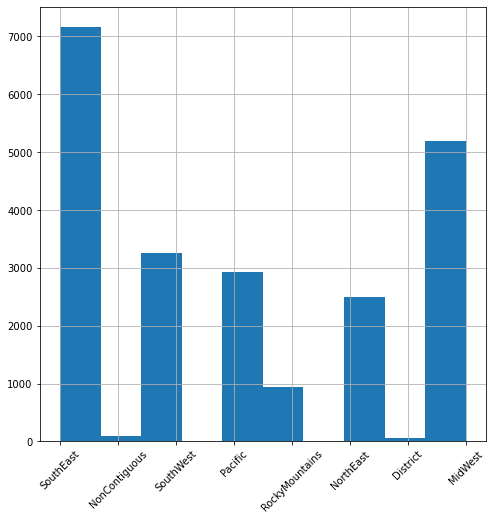

In [47]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
food_deserts['region'].hist(ax = ax)
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

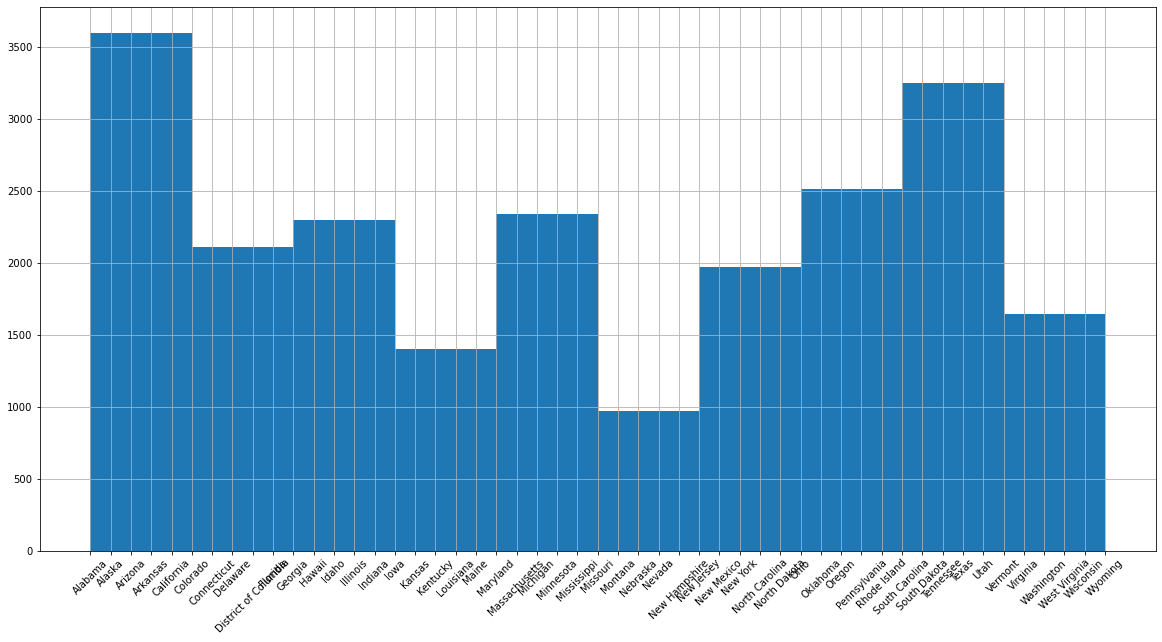

In [48]:
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
food_deserts['State'].hist(ax = ax)
plt.xticks(rotation=45)

In [49]:
X = census_filled_df2.drop(['food_desert_label', 'CensusTract', 'State', 'County', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'MedianIncome', 'region'], axis = 1)
y = census_filled_df2['food_desert_label']

In [50]:
X_int = X.astype(int)
#X_int.dtypes

In [51]:
X_cat = X.astype('int')
y_cat = y.astype('int')

In [52]:
X_cat

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,PovertyRate,Urban,Seniors,Kids,Snap
0,1948,940,1008,0,87,7,0,0,0,1503,8,8,34,17,21,11,15,90,4,0,0,2,2,25,943,77,18,4,0,5,10,1,221,507,112
1,2156,1059,1097,0,40,53,0,2,0,1662,25,40,22,24,21,9,22,86,13,0,0,0,0,23,753,77,16,6,0,13,18,1,214,606,202
2,2968,1364,1604,0,74,18,0,1,0,2335,12,19,31,24,22,9,12,94,2,0,0,0,2,19,1373,64,23,12,0,6,19,1,439,894,120
3,4423,2172,2251,10,82,3,1,0,0,3306,2,1,27,20,27,8,16,86,9,0,0,2,1,25,1782,75,21,3,0,10,3,1,904,1015,82
4,10763,4922,5841,0,68,24,0,3,0,7666,11,17,49,14,18,2,15,88,10,0,0,0,0,24,5037,67,27,5,0,4,8,1,1126,3162,488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73051,3256,1615,1641,12,84,1,0,0,0,2361,14,22,32,19,16,18,13,72,13,0,4,0,9,15,1529,70,21,6,1,4,15,0,593,884,116
73052,2578,1264,1314,11,85,0,0,0,0,1841,13,11,29,21,15,21,12,77,9,0,7,4,0,8,1175,67,23,9,0,6,14,1,399,674,124
73053,2566,1265,1301,18,76,0,0,0,0,1888,13,20,24,13,27,22,12,72,14,0,7,3,2,12,1188,72,19,7,0,10,12,1,516,614,97
73054,3442,1998,1444,2,93,0,1,0,0,2843,8,15,31,11,11,26,18,67,14,11,1,2,2,33,1684,70,19,8,2,4,9,0,499,655,50


In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=10)
#fit = test.fit(x_array, y_array)
X_new= test.fit_transform(X_cat, y_cat)


In [54]:
filter_ = test.get_support()
feature_names = np.array(X_cat.columns)
feature_names[filter_]

array(['TotalPop', 'White', 'Black', 'Citizen', 'Poverty', 'ChildPoverty',
       'Employed', 'PovertyRate', 'Seniors', 'Snap'], dtype=object)

In [85]:
selected_features_train = X_cat[['TotalPop', 'White', 'Black', 'Citizen', 'Poverty', 'ChildPoverty',
       'Employed', 'PovertyRate', 'Seniors', 'Snap']]

In [76]:

from sklearn.feature_selection import f_regression

In [77]:
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(72839, 10)


In [78]:
filter_ = fs.get_support()
feature_names = np.array(X.columns)
feature_names[filter_]

array(['White', 'Black', 'Poverty', 'ChildPoverty', 'Professional',
       'Service', 'Production', 'Unemployment', 'PovertyRate', 'Snap'],
      dtype=object)

In [79]:
selected_features_train2 = X[['White', 'Black', 'Poverty', 'ChildPoverty', 'Professional',
       'Service', 'Production', 'Unemployment', 'PovertyRate', 'Snap']]

In [56]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat)

In [81]:
selected_features_train2

,White,Black,Poverty,ChildPoverty,Professional,Service,Production,Unemployment,PovertyRate,Snap
0,87.4,7.7,8.1,8.4,34.7,17,15.2,5.4,10.0,112
1,40.4,53.3,25.5,40.3,22.3,24.7,22,13.3,18.2,202
2,74.5,18.6,12.7,19.7,31.4,24.9,12.4,6.2,19.1,120
3,82.8,3.7,2.1,1.6,27,20.8,16.4,10.8,3.3,82
4,68.5,24.8,11.4,17.5,49.6,14.2,15.8,4.2,8.5,488
...,...,...,...,...,...,...,...,...,...,...
73051,84.7,1.8,14.1,22.6,32.8,19.3,13.5,4.2,15.2,116
73052,85.6,0,13.6,11.3,29.4,21.8,12.4,6.7,14.5,124
73053,76.2,0,13.8,20.3,24.7,13.4,12,10.1,12.7,97
73054,93.6,0.4,8.6,15.5,31.4,11.7,18.6,4.3,9.2,50


In [82]:
xgb_cls = xgb.XGBClassifier(n_estimators=500, max_depth=25, learning_rate=0.05)

In [60]:
xgb_cls.fit(X_train, y_train)

/Users/katiechenning/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:27:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
preds = xgb_cls.predict(X_test)
print(preds)

[0 0 0 ... 0 0 0]


In [62]:
len(preds)

18210

In [63]:
accuracy = accuracy_score(y_test, preds)
print("Accuracy: %.3f%%" % (accuracy * 100))

Accuracy: 87.051%


In [64]:
mean_absolute_error(y_test,preds)

0.12948929159802305

In [130]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, preds)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[11644   991]
 [ 1291  4284]]


<AxesSubplot:>

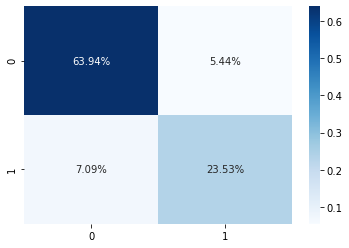

In [140]:
import seaborn as sns
sns.heatmap(confusion/np.sum(confusion), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

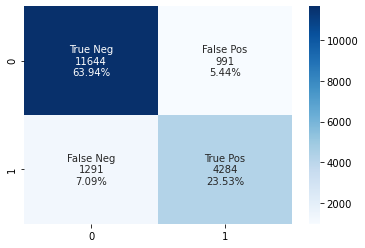

In [147]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion.flatten()/np.sum(confusion)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')

In [101]:
4284/(4284+1291)

0.7684304932735426

In [102]:
(0.7684304932735426 * 0.8121327014218009) / (0.8121327014218009 + 0.7684304932735426)


0.39483870967741935

In [103]:
0.39483870967741935 * 2

0.7896774193548387

In [86]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(selected_features_train, y_cat)

In [88]:
xgb_cls2 = xgb.XGBClassifier(n_estimators=500, max_depth=25, learning_rate=0.05)

In [226]:
xgb_cls3 = xgb.XGBClassifier(n_estimators=600, max_depth=25, learning_rate=0.05)

In [227]:
xgb_cls3.fit(X_train, y_train)

/Users/katiechenning/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:24:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [228]:
xgb3preds = xgb_cls3.predict(X_test)
print(xgb3preds)

[0 0 0 ... 0 1 1]


In [229]:
xgb3accuracy = accuracy_score(y_test, xgb3preds)
print("Accuracy: %.3f%%" % (xgb3accuracy * 100))

Accuracy: 87.457%


In [231]:
xgb_cls4 = xgb.XGBClassifier(n_estimators=700, max_depth=6, learning_rate=0.05)

In [232]:
xgb_cls4.fit(X_train, y_train)

[21:36:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=700, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [233]:
xgb4preds = xgb_cls4.predict(X_test)
print(xgb4preds)

[0 0 0 ... 0 1 1]


In [234]:
xgb4accuracy = accuracy_score(y_test, xgb4preds)
print("Accuracy: %.3f%%" % (xgb4accuracy * 100))

Accuracy: 87.512%


In [89]:
xgb_cls2.fit(X_train2, y_train2)

[20:01:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
xgb2preds = xgb_cls2.predict(X_test2)
print(xgb2preds)

[1 0 0 ... 0 0 0]


In [91]:
xgb2accuracy = accuracy_score(y_test2, xgb2preds)
print("Accuracy: %.3f%%" % (xgb2accuracy * 100))

Accuracy: 84.190%


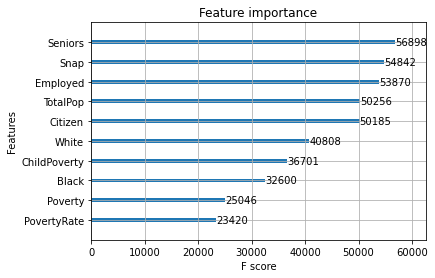

In [92]:
xgb.plot_importance(xgb_cls2)
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

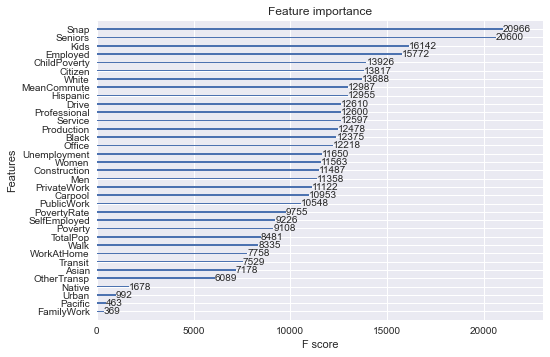

In [160]:
xgb.plot_importance(xgb_cls)
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [66]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_predGNB = GNB.predict(X_test)

In [67]:
NBaccuracy = accuracy_score(y_test, y_predGNB)
print("Accuracy: %.3f%%" % (NBaccuracy * 100))

Accuracy: 82.301%


In [68]:
LRclf = LogisticRegression()
LRclf.fit(X_train, y_train)

/Users/katiechenning/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
LR_preds = LRclf.predict(X_test)

In [70]:
LRaccuracy = accuracy_score(y_test, LR_preds)
print("Accuracy: %.3f%%" % (LRaccuracy * 100))

Accuracy: 81.982%


In [71]:
from sklearn.dummy import DummyClassifier

In [72]:
dummy_clf = DummyClassifier(strategy="stratified")

In [73]:
dummy_clf.fit(X_train, y_train)
dummy_preds = dummy_clf.predict(X_test)
dummy_clf.score(X_train, y_train)

0.5746764538981127

In [74]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [75]:
XGBprobs = xgb_cls.predict_proba(X_test)
LRprobs = LRclf.predict_proba(X_test)
GNBprobs = GNB.predict_proba(X_test)
Dummyprobs = dummy_clf.predict_proba(X_test)

In [93]:
XGBprobs2 = xgb_cls2.predict_proba(X_test2)

In [156]:
fpr1, tpr1, thresh1 = roc_curve(y_test, XGBprobs[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, LRprobs[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, GNBprobs[:,1], pos_label=1)

In [157]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

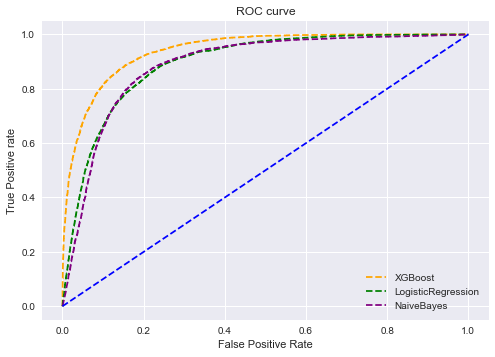

In [158]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='XGBoost')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='LogisticRegression')

plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='NaiveBayes')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [159]:
XGB_auc = roc_auc_score(y_test, XGBprobs[:,1])

GNB_auc = roc_auc_score(y_test, GNBprobs[:,1] )
LR_auc = roc_auc_score(y_test, LRprobs[:,1] )
print("AUC for  XGBoost: {:.3f}".format(XGB_auc))

print("AUC for Naive Bayes: {:.3f}".format(GNB_auc))
print("AUC for Logistic Regression: {:.3f}".format(LR_auc))

AUC for  XGBoost: 0.941
AUC for Naive Bayes: 0.887
AUC for Logistic Regression: 0.894


In [94]:
XGB_auc2 = roc_auc_score(y_test2, XGBprobs2[:,1])
XGB_auc2

0.9059636323960717

In [ ]:
#discussing features 
#sub-groups
#create graph for percantage of census tracts as food deserts 
#create graoh for percentage of food desert census tracts as divided by geographic location 

In [98]:
XGBcv_score = cross_val_score(xgb_cls, X_train, y_train, cv=5)

/Users/katiechenning/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:22:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:27:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:32:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:36:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [99]:
print('Cross-validation scores (5-fold):', XGBcv_score)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(XGBcv_score)))

Cross-validation scores (5-fold): [0.87543474 0.8712246  0.87470254 0.87616694 0.87194508]
Mean cross-validation score (5-fold): 0.874


In [148]:
import geopandas as gpd

In [153]:
def region_percentage(text):
    if text == 'SouthWest':
        return 39.12
    elif text == 'SouthEast':
        return 36.21
    elif text == 'MidWest':
        return 30.4
    elif text == 'Pacific':
        return 28.39
    elif text == 'NonContiguous':
        return 20.48
    elif text == 'District':
        return 30.16
    elif text == 'NorthEast':
        return 18.49
    elif text == 'RockyMountains':
        return 29.02
    
    

In [154]:
census_filled_df2['percent_food_desert'] = census_filled_df2['region'].apply(region_percentage)

<ipython-input-154-cba47b43a1b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_filled_df2['percent_food_desert'] = census_filled_df2['region'].apply(region_percentage)


In [155]:
census_filled_df2.isna().sum()

CensusTract            0
State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic               0
White                  0
Black                  0
Native                 0
Asian                  0
Pacific                0
Citizen                0
Income                 0
IncomeErr              0
IncomePerCap           0
IncomePerCapErr        0
Poverty                0
ChildPoverty           0
Professional           0
Service                0
Office                 0
Construction           0
Production             0
Drive                  0
Carpool                0
Transit                0
Walk                   0
OtherTransp            0
WorkAtHome             0
MeanCommute            0
Employed               0
PrivateWork            0
PublicWork             0
SelfEmployed           0
FamilyWork             0
Unemployment           0
food_desert_label      0
PovertyRate            0
Urban                  0


In [160]:
states = gpd.read_file('tl_2021_us_state')
type(states)

geopandas.geodataframe.GeoDataFrame

In [217]:
some_states1 = states[states['NAME'] != 'Guam'] 

In [218]:
some_states2 = some_states1[some_states1['NAME'] != 'American Samoa'] 

In [219]:
some_states3 = some_states2[some_states2['NAME'] != 'Commonwealth of the Northern Mariana Islands'] 

In [220]:
some_states4 = some_states3[some_states3['NAME'] != 'United States Virgin Islands'] 

In [221]:
some_states5 = some_states4[some_states4['NAME'] != 'Puerto Rico'] 

In [225]:
some_states5

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266298634,489204185,+38.6472854,-080.6183274,"POLYGON ((-9001123.261 4473004.892, -9001133.5..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138961722096,45972570361,+28.3989775,-082.5143005,"MULTIPOLYGON (((-9251622.395 2812502.757, -925..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778561906,6216493488,+40.1028754,-089.1526108,"POLYGON ((-9926590.650 4422874.968, -9926687.9..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232627084,18949394733,+46.3159573,-094.1996043,"POLYGON ((-10324402.205 5637866.582, -10324470..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151992308,6979074857,+38.9466584,-076.6744939,"POLYGON ((-8434298.663 4748786.479, -8434265.7..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677763359,1323686988,+41.5964850,-071.5264901,"MULTIPOLYGON (((-7979248.296 5007680.809, -797..."
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214049931578,2391569647,+44.3484222,-114.5588538,"POLYGON ((-12361525.509 5359127.722, -12361517..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23190115212,1025971768,+43.6726907,-071.5843145,"POLYGON ((-7931010.666 5243852.655, -7931301.0..."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125933327733,13456093195,+35.5397100,-079.1308636,"POLYGON ((-8562247.394 4350275.394, -8562271.6..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23872569964,1030754609,+44.0589536,-072.6710173,"POLYGON ((-8063385.014 5318266.296, -8063356.4..."


In [223]:
#states.head()
some_states6 = some_states5.to_crs("EPSG:3395")

<AxesSubplot:>

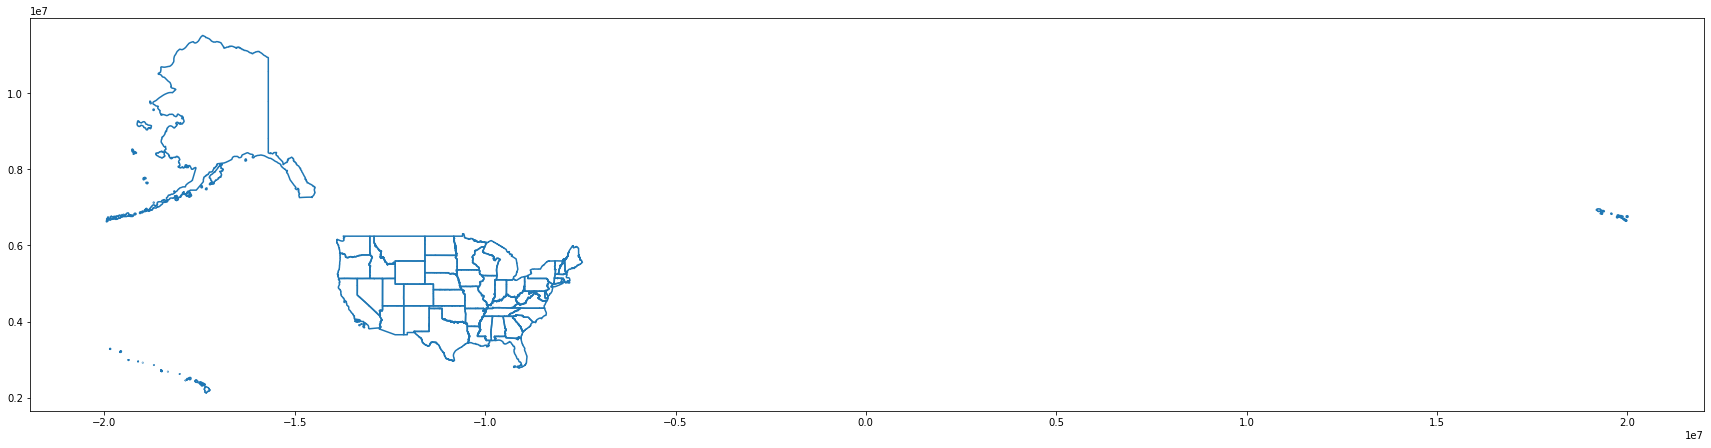

In [224]:

fig,ax = plt.subplots(figsize = (30, 15))
#states.plot()
some_states6.boundary.plot(ax = ax)
# minx, miny, maxx, maxy = states.total_bounds
# ax.set_xlim(minx, maxx)
# ax.set_ylim(miny, maxy)
